In [71]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv("titanic.csv", sep=';', index_col='Id_Pasajero')
df.head()


,Survived,Clase,Nombre,Sexo,Edad,Familiares,Tiquete,Tarifa,Cabina,Embarcado
Id_Pasajero,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",Masculino,22.0,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Femenino,38.0,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",Femenino,26.0,0,STON/O2. 3101282,7.93,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Femenino,35.0,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",Masculino,35.0,0,373450,8.05,NaN,S


In [73]:
df.isna().sum()

Survived        0
Clase           0
Nombre          0
Sexo            0
Edad          177
Familiares      0
Tiquete         0
Tarifa          0
Cabina        687
Embarcado       2
dtype: int64

In [74]:
df['Edad'] = df['Edad'].fillna(df['Edad'].mean())

In [75]:
df['Embarcado'] = df['Embarcado'].fillna(df['Embarcado'].mode())

In [76]:
df['Cabina'] = df['Cabina'].fillna(df['Cabina'].mode())

In [77]:
df

,Survived,Clase,Nombre,Sexo,Edad,Familiares,Tiquete,Tarifa,Cabina,Embarcado
Id_Pasajero,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",Masculino,22.000000,0,A/5 21171,7.25,C23 C25 C27,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Femenino,38.000000,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",Femenino,26.000000,0,STON/O2. 3101282,7.93,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Femenino,35.000000,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",Masculino,35.000000,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",Masculino,27.000000,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",Femenino,19.000000,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",Femenino,29.699118,2,W./C. 6607,23.45,NaN,S


In [78]:
for col in df.dtypes[df.dtypes == 'object'].index:
    for_dummy = df.pop(col)
    df = pd.concat ([df, pd.get_dummies (for_dummy, prefix=col)], axis=1)
df.head()    

,Survived,Clase,Edad,Familiares,Tarifa,"Nombre_Abbing, Mr. Anthony","Nombre_Abbott, Mr. Rossmore Edward","Nombre_Abbott, Mrs. Stanton (Rosa Hunt)","Nombre_Abelson, Mr. Samuel","Nombre_Abelson, Mrs. Samuel (Hannah Wizosky)",...,Cabina_F G73,Cabina_F2,Cabina_F33,Cabina_F38,Cabina_F4,Cabina_G6,Cabina_T,Embarcado_C,Embarcado_Q,Embarcado_S
Id_Pasajero,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,0,7.25,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,1,1,38.0,0,71.28,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1,3,26.0,0,7.93,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,1,1,35.0,0,53.10,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,0,3,35.0,0,8.05,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [83]:
df.shape

(891, 1728)

In [79]:
labels = df.pop("Survived")

In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (df, labels, test_size = 0.25)

In [90]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [91]:
y_pred = rf.predict(x_test)

In [92]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve (y_test, y_pred)
roc_auc = auc (false_positive_rate, true_positive_rate)
roc_auc

0.7883782883782884

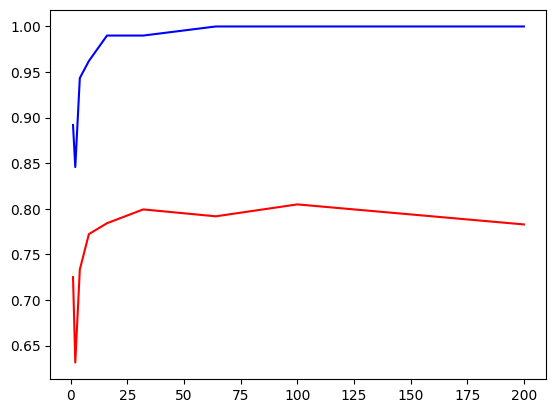

In [97]:
n_estimators = [1,2,4,8,16,32,64,100,200]
train_results = []
test_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit (x_train, y_train)
    train_pred = rf.predict (x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve (y_train, train_pred)
    roc_auc = auc (false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve (y_test, y_pred)
    roc_auc = auc (false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, =plt.plot (n_estimators, train_results, "b", label ="Train AUC")
line2, =plt.plot (n_estimators, test_results, "r", label ="Test AUC")
    

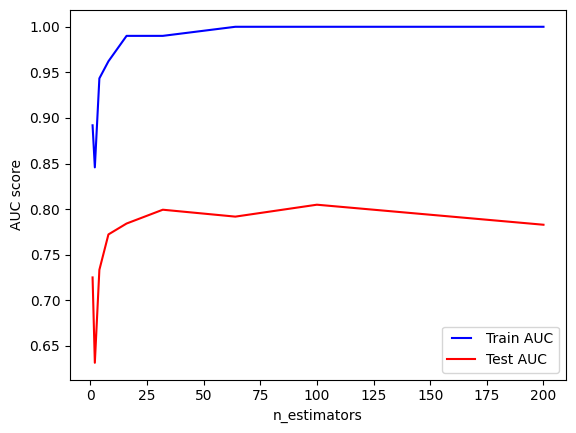

In [99]:
from matplotlib.legend_handler import HandlerLine2D
line1, =plt.plot (n_estimators, train_results, "b", label ="Train AUC")
line2, =plt.plot (n_estimators, test_results, "r", label ="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()